In [16]:
# -*- coding: utf-8 -*-

from itertools import chain, combinations
import networkx
import matplotlib.pyplot as plt

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
   

def linked_choices(extra_edges):
    
    choices = []
    remaining = list(range(n))
    
    while remaining != []:
        
        ind = remaining[0]
        link = [ind]
        remaining.remove(ind)
        nextind = (extra_edges[ind]+n-1)%n
        
        while nextind != link[0]:
            
            link.append(nextind)
            ind = nextind
            nextind = (extra_edges[ind]+n-1)%n
            remaining.remove(ind)
        
        choices.append(link)
            
    if len(choices) > 20:
        print("Ended function call to prevent crash")
        return []   
    
    return choices


def find_tours(extra_edges):
    
    choices = linked_choices(extra_edges)
    raw_possible_tours = list(powerset(choices))
    possible_tours = []
    
    for pt in raw_possible_tours:
        l = list(sum(pt, []))
        possible_tours.append(l)
        
    permutations = []
    for pt in possible_tours:
        generated_tour = [(i + 1) % n for i in range(n)]
        for i in pt:
            generated_tour[i] = extra_edges[i]
        permutations.append(generated_tour)
    
    #print(permutations)
    tours = []
    
    for p in permutations:
    
        if set(p) != set(range(n)):
            continue
        subcycle = False
        ind = 0

        for i in range(1, n+1):
            ind = p[ind]
            if ind == 0 and i < n-1:
                subcycle = True
                break
        if not subcycle:
            tours.append(p)
                    
    return tours


def tour_polynomial(extra_edges):
    poly = [0]*(n+1)
    tours = find_tours(extra_edges)
    for t in tours:
        count = 0
        for i in range(n):
            if (t[i] - i + n) % n != 1:
                count += 1
        poly[count] += 1
    print(poly)
    poly_str = ""
    for i in range(n+1):
        if poly[i] == 0:
            continue
        elif i == 0:
            poly_str += "1 + "
        elif poly[i] == 1:
            poly_str += "z^" + str(i) + " + "
        else:
            poly_str += str(poly[i])+"z^" + str(i) + " + "
    return poly_str[:-2]

def draw_tours(tours):
    
    for t in tours:
        g = networkx.Graph()
        g.add_nodes_from(list(range(n)))
    
        orig_edges = [(i, (i+1)%n) for i in range(n)]
        tour_edges = [(i, t[i]) for i in range(n)]
        tour_edges2 = [(t[i], i) for i in range(n)]
        
        g.add_edges_from(tour_edges)
        for i in range(n):
            if t[i] == (i+1)%n:
                continue;
            else:
                g.add_edge(i, (i+1)%n)
        
        edge_colors = ['blue' if edge in tour_edges or edge in tour_edges2 else 'yellow' for edge in g.edges()]
        
        networkx.draw_circular(g, with_labels=True, edge_color=edge_colors)
        plt.draw()
        plt.show()
        plt.figure()


n = 12
default_tour = [(i + 1) % n for i in range(n)]
 

extra_edges = [(i + n//2 + 1) % n for i in range(n)]
"""
print(default_tour)
print(extra_edges)

tours = find_tours(extra_edges)
print(tours)
print(len(tours))
"""
print(tour_polynomial(extra_edges))


[1, 0, 0, 0, 15, 0, 0, 0, 15, 0, 0, 0, 1]
1 + 15z^4 + 15z^8 + z^12 


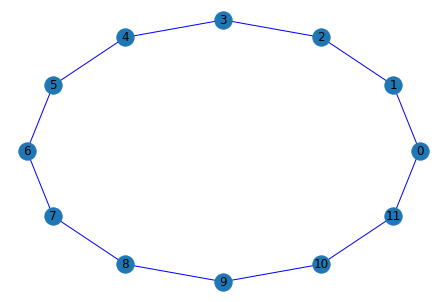

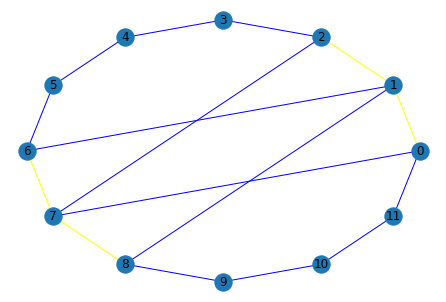

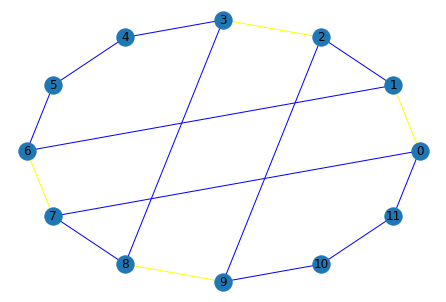

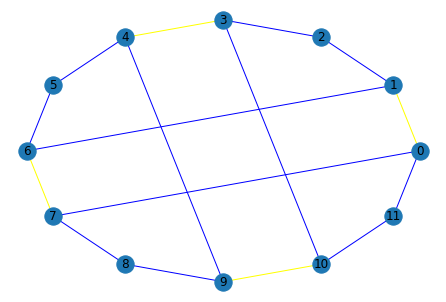

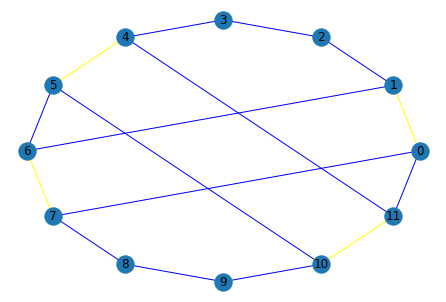

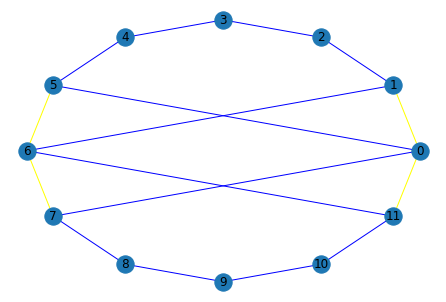

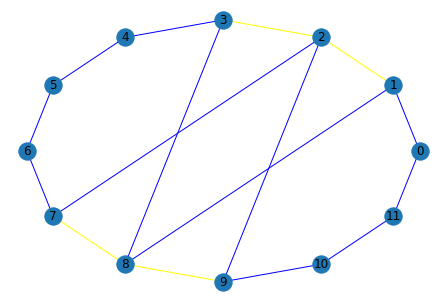

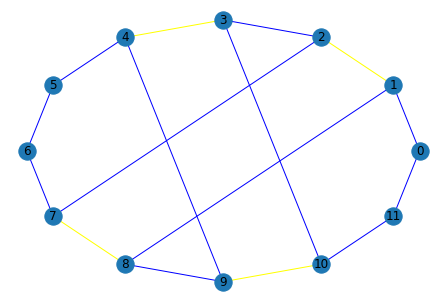

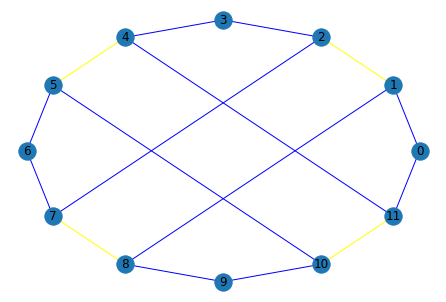

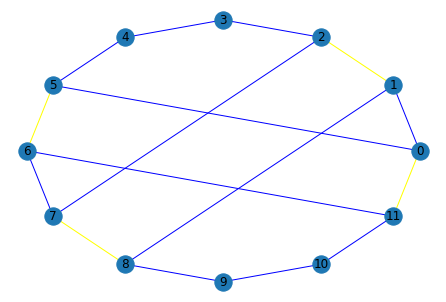

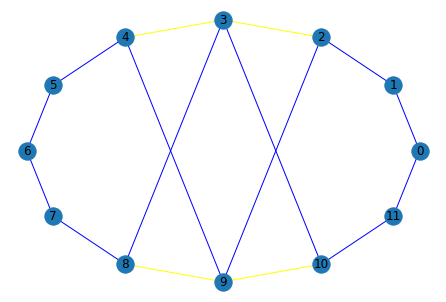

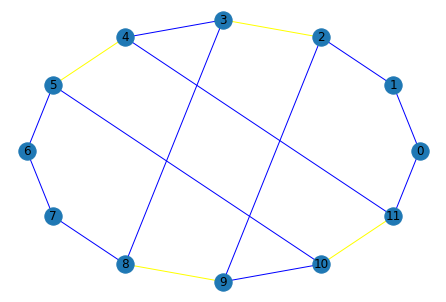

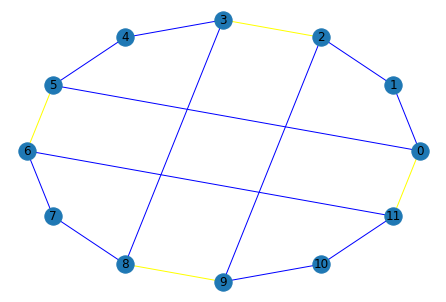

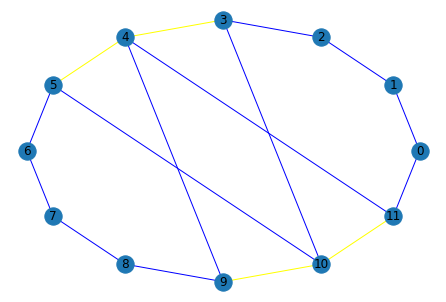

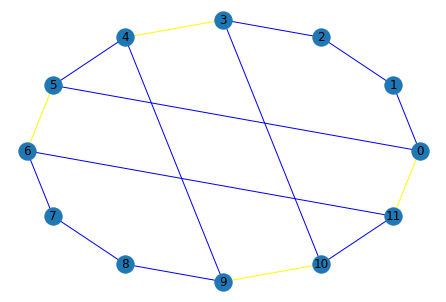

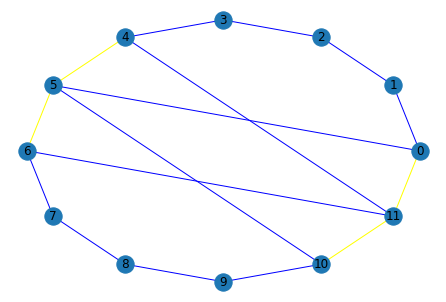

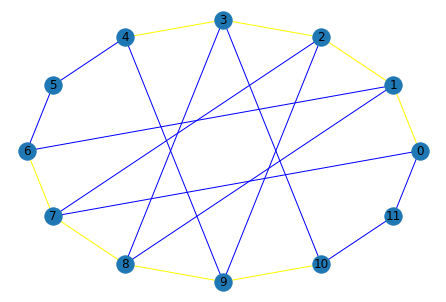

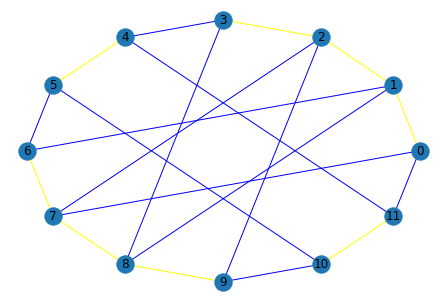

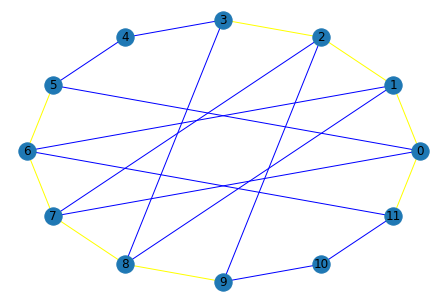

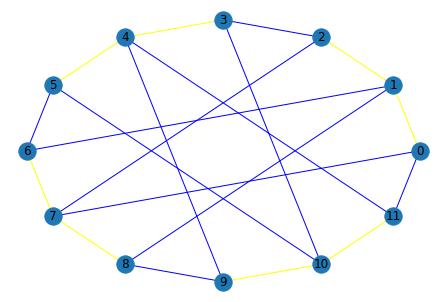

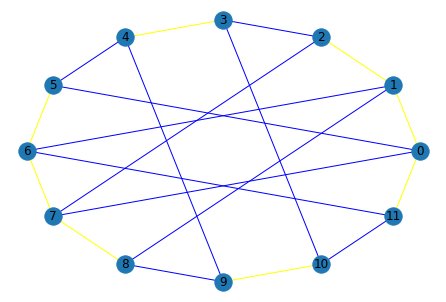

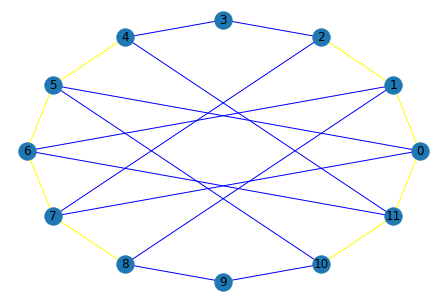

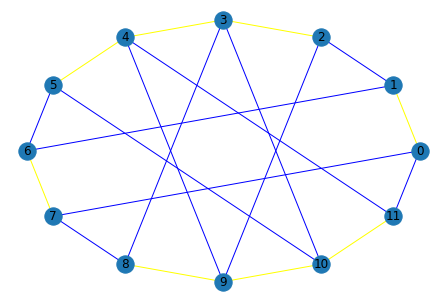

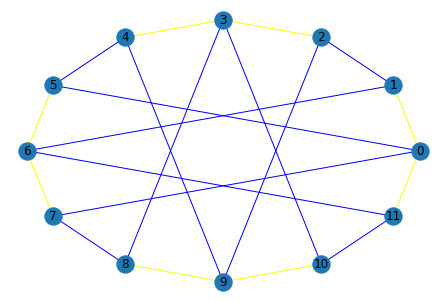

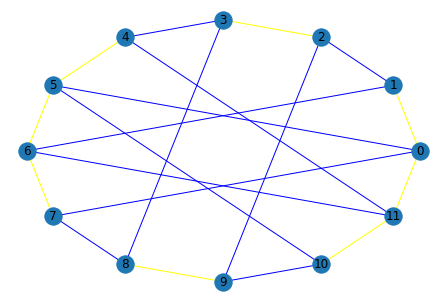

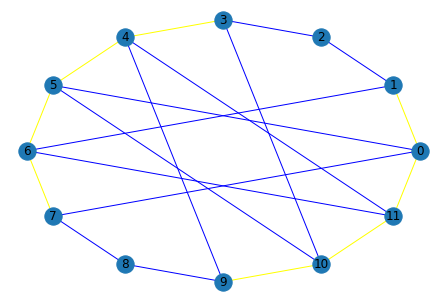

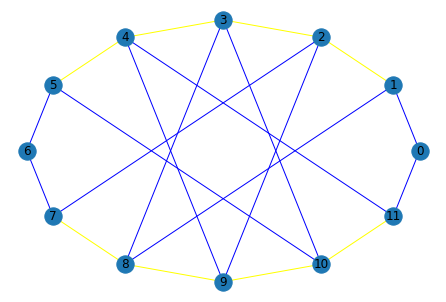

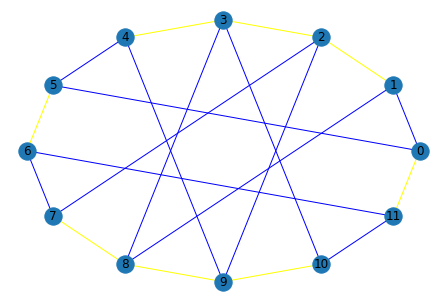

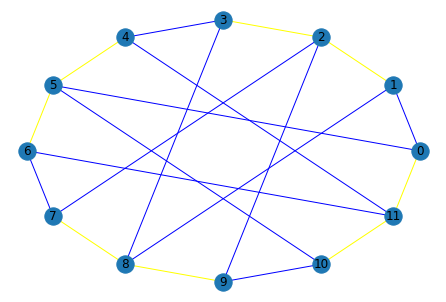

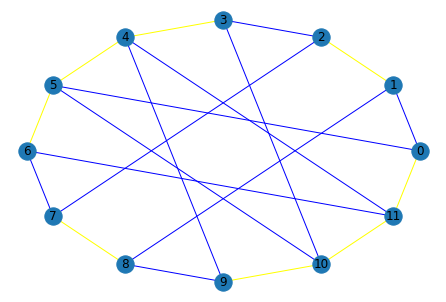

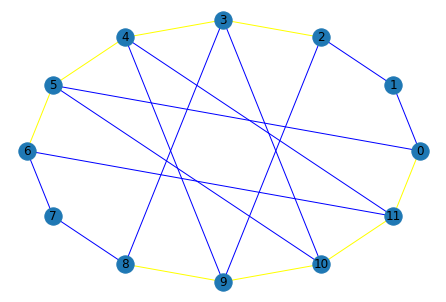

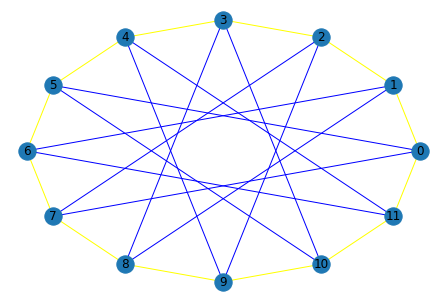

<Figure size 432x288 with 0 Axes>

In [17]:
tours = find_tours(extra_edges)
draw_tours(tours)
